# Data Viz for Distill Before Veirfy Experiment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import seaborn as sns

## Depth Experiment with Val Loss

In [98]:
experiment = "exp_depth_val_10_17_2022"
results = pd.read_csv(f"./{experiment}/results.csv")
#results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

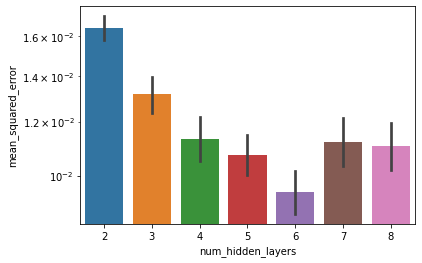

In [100]:
sns.barplot(data=results, x=results["num_hidden_layers"], y="mean_squared_error")
plt.yscale("log")

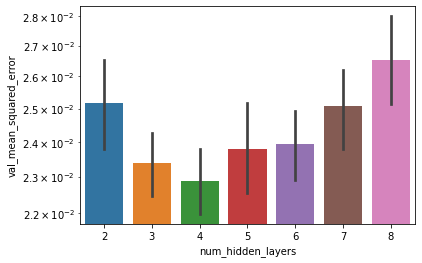

In [101]:
sns.barplot(data=results, x=results["num_hidden_layers"], y="val_mean_squared_error")
plt.yscale("log")

## depth experiment

In [2]:
experiment = "exp_depth_10_16_2022"
results = pd.read_csv(f"./{experiment}/results.csv")
results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

In [3]:
results_teacher.mean()

/var/folders/3g/8436y4yj1r9367dvt15y6jqcdx0hcv/T/ipykernel_21180/693487289.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_teacher.mean()


prop.1.python_time          5.625593
prop.1.reported_runtime     3.036667
prop.2.python_time         13.764449
prop.2.reported_runtime    11.636667
prop.3.python_time         32.831075
prop.3.reported_runtime    30.743333
prop.4.python_time         10.491317
prop.4.reported_runtime    11.225000
dtype: float64

In [4]:
results

,num_hidden_layers,hidden_layer_width,repetition,n_synthetic_data_points,synthetic_data_sampling,tau,a_prev,uuid,loss,mean_squared_error,...,prop.2.reported_runtime,prop.2.stdout_result,prop.3.result,prop.3.python_time,prop.3.reported_runtime,prop.3.stdout_result,prop.4.result,prop.4.python_time,prop.4.reported_runtime,prop.4.stdout_result
0,2,50,1,4096,random_iid,1,1,07399d08-0c10-4fc2-9755-317073445a92,0.013050,0.013050,...,0.7,network is SAFE,holds,2.014103,-1.0,Safe,violated,2.081646,0.1,network is UNSAFE with confirmed counterexampl...
1,2,50,2,4096,random_iid,1,1,38764d7a-6da1-4b73-b9ce-553f1e3903f1,0.012713,0.012713,...,0.1,network is UNSAFE with confirmed counterexampl...,holds,2.121153,0.1,network is SAFE,violated,2.282663,0.2,network is UNSAFE with confirmed counterexampl...
2,2,50,3,4096,random_iid,1,1,474bc2a9-d431-460f-81df-512145f79848,0.013584,0.013584,...,0.4,network is SAFE,holds,2.068942,-1.0,Safe,holds,2.090867,-1.0,Safe
3,2,50,4,4096,random_iid,1,1,696c8570-8286-406e-ad32-c3982d89b595,0.014124,0.014124,...,0.3,network is SAFE,holds,2.280330,0.1,network is SAFE,holds,1.961015,-1.0,Safe
4,2,50,5,4096,random_iid,1,1,b1a914e2-445b-4926-8952-87b2e654549a,0.015040,0.015040,...,0.2,network is UNSAFE with confirmed counterexampl...,violated,2.206567,0.1,network is UNSAFE with confirmed counterexampl...,holds,1.903472,-1.0,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,8,50,26,4096,random_iid,1,1,dd1e9c74-fbf5-4d6a-9323-eb57aee1077c,0.006777,0.006777,...,0.4,network is UNSAFE with confirmed counterexampl...,violated,2.096440,0.2,network is UNSAFE with confirmed counterexampl...,holds,2.241677,0.3,network is SAFE
206,8,50,27,4096,random_iid,1,1,d8a58de4-5315-4123-85fb-70d0b88227a9,0.003753,0.003753,...,1.1,network is SAFE,holds,1.922315,-1.0,Safe,holds,1.959077,-1.0,Safe
207,8,50,28,4096,random_iid,1,1,873480a4-234e-41a1-9182-4b80e84c5fbc,0.007547,0.007547,...,0.3,network is UNSAFE with confirmed counterexampl...,holds,2.082904,0.3,network is SAFE,holds,2.334887,0.4,network is SAFE
208,8,50,29,4096,random_iid,1,1,bbc48389-7edf-49b0-aa08-24607fb82d46,0.003841,0.003841,...,2.0,network is SAFE,violated,2.231696,0.4,network is UNSAFE with confirmed counterexampl...,holds,1.928231,0.4,network is SAFE


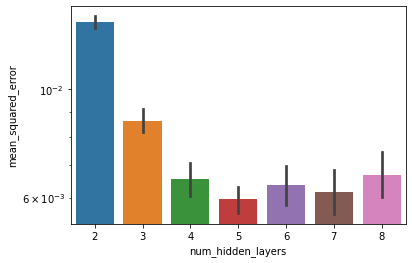

In [5]:
sns.barplot(data=results, x=results["num_hidden_layers"], y="mean_squared_error")
plt.yscale("log")

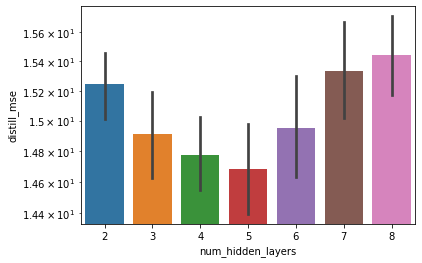

In [6]:
sns.barplot(data=results, x=results["num_hidden_layers"], y="distill_mse")
plt.yscale("log")

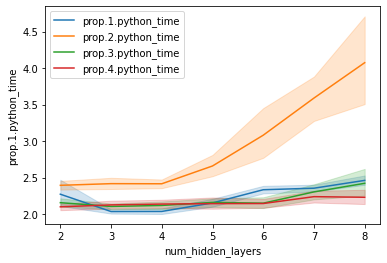

In [7]:
columns = [f'prop.{p}.python_time' for p in [1,2,3,4]]
#[results[col] > 0 for col in columns]

filtered_results = results[reduce(lambda a, b: a & b, [results[col] > 0 for col in columns])]
for column in columns:
    sns.lineplot(x=filtered_results["num_hidden_layers"], y=filtered_results[column], label=column)


/var/folders/3g/8436y4yj1r9367dvt15y6jqcdx0hcv/T/ipykernel_21180/1723549814.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  improvement = (1-results/(results_teacher.mean()))*100


Text(0, 0.5, '% Improvement')

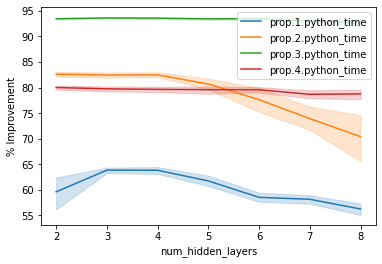

In [8]:
improvement = (1-results/(results_teacher.mean()))*100

columns = [f'prop.{p}.python_time' for p in [1,2,3,4]]

for column in columns:
    sns.lineplot(x=results["num_hidden_layers"], y=improvement[column], label=column)

plt.ylabel("% Improvement")

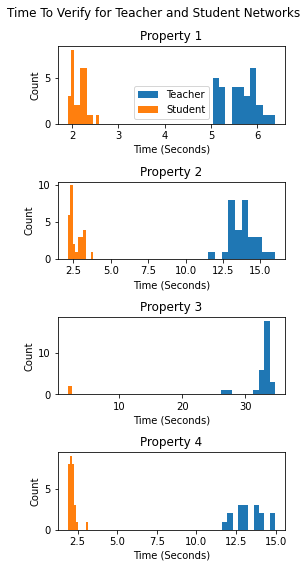

In [96]:
plt.figure(figsize=(4,8))
for p in [1,2,3,4]:
    plt.subplot(4,1,p)
    plt.hist(results_teacher[(results_teacher[f"prop.{p}.result"]!="error")][f"prop.{p}.python_time"], label="Teacher")
    plt.hist(results[(results["num_hidden_layers"]==5) & (results[f"prop.{p}.result"]!="error")][f"prop.{p}.python_time"], label="Student")
    if p==1:
        plt.legend()
    plt.title(f"Property {p}")
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Count")

plt.suptitle("Time To Verify for Teacher and Student Networks")
plt.tight_layout()

Property 1
Teacher Network
holds    30
Name: prop.1.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.1.result, dtype: float64
Teacher Miss Rate for Property 1 = 0.0
Property 1
Student Network
holds    210
Name: prop.1.result, dtype: int64
Property 2
Teacher Network
holds    30
Name: prop.2.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.2.result, dtype: float64
Teacher Miss Rate for Property 2 = 0.0
Property 2
Student Network
holds       152
violated     58
Name: prop.2.result, dtype: int64
Property 3
Teacher Network
holds    30
Name: prop.3.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.3.result, dtype: float64
Teacher Miss Rate for Property 3 = 0.0
Property 3
Student Network
holds       177
violated     33
Name: prop.3.result, dtype: int64
Property 4
Teacher Network
holds    16
error    14
Name: prop.4.result, dtype: int64
holds       16.0
violated     0.0
error       14.0
Name: p

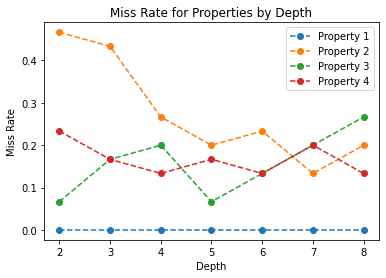

In [58]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

for property in [1,2,3,4]:
    print(f"Property {property}")
    print("Teacher Network")
    print(results_teacher[f'prop.{property}.result'].value_counts())

    count_results = results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    print(f"Property {property}")
    print("Student Network")
    print(results[f'prop.{property}.result'].value_counts())

    count_results = results.groupby("num_hidden_layers")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    plt.plot(student_miss_rate, label=f"Property {property}", marker="o", linestyle="--")

plt.legend()
plt.ylabel("Miss Rate")
plt.xlabel("Depth")
plt.title("Miss Rate for Properties by Depth")
plt.show()




## ndata experiment

In [59]:
experiment = "exp_ndata_10_16_2022"
ndata_results = pd.read_csv(f"./{experiment}/results.csv")
ndata_results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

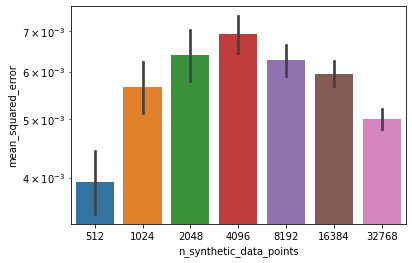

In [60]:
sns.barplot(data=ndata_results, x="n_synthetic_data_points", y="mean_squared_error")
plt.yscale("log")

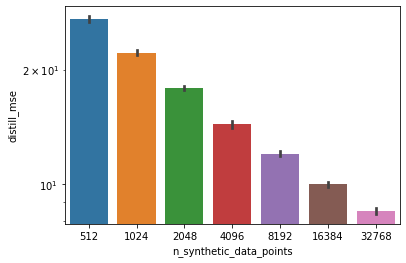

In [61]:
sns.barplot(data=ndata_results, x="n_synthetic_data_points", y="distill_mse")
plt.yscale("log")

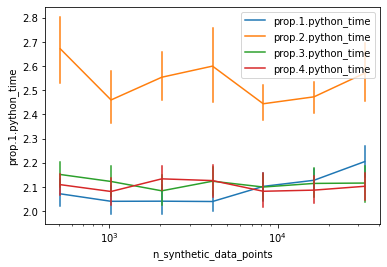

In [62]:
columns = [f'prop.{p}.python_time' for p in [1,2,3,4]]
#[results[col] > 0 for col in columns]

#filtered_results = ndata_results[reduce(lambda a, b: a & b, [ndata_results[col] > 0 for col in columns])]
for column in columns:
    sns.lineplot(x=ndata_results["n_synthetic_data_points"], y=ndata_results[column], label=column, err_style="bars")

plt.xscale("log")


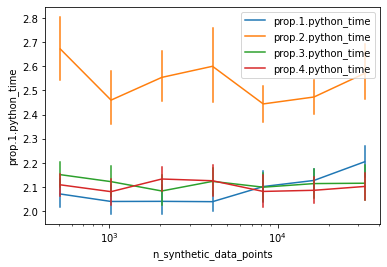

In [63]:
columns = [f'prop.{p}.python_time' for p in [1,2,3,4]]
#[results[col] > 0 for col in columns]

#filtered_results = ndata_results[reduce(lambda a, b: a & b, [ndata_results[col] > 0 for col in columns])]
for column in columns:
    sns.lineplot(x=ndata_results["n_synthetic_data_points"], y=ndata_results[column], label=column, err_style="bars")

plt.xscale("log")


Property 1
Teacher Network
holds    60
Name: prop.1.result, dtype: int64
holds       60.0
violated     0.0
error        0.0
Name: prop.1.result, dtype: float64
Teacher Miss Rate for Property 1 = 0.0
Property 1
Student Network
holds    210
Name: prop.1.result, dtype: int64
Property 2
Teacher Network
holds    60
Name: prop.2.result, dtype: int64
holds       60.0
violated     0.0
error        0.0
Name: prop.2.result, dtype: float64
Teacher Miss Rate for Property 2 = 0.0
Property 2
Student Network
holds       150
violated     60
Name: prop.2.result, dtype: int64
Property 3
Teacher Network
holds    60
Name: prop.3.result, dtype: int64
holds       60.0
violated     0.0
error        0.0
Name: prop.3.result, dtype: float64
Teacher Miss Rate for Property 3 = 0.0
Property 3
Student Network
holds       174
violated     36
Name: prop.3.result, dtype: int64
Property 4
Teacher Network
holds    31
error    29
Name: prop.4.result, dtype: int64
holds       31.0
violated     0.0
error       29.0
Name: p

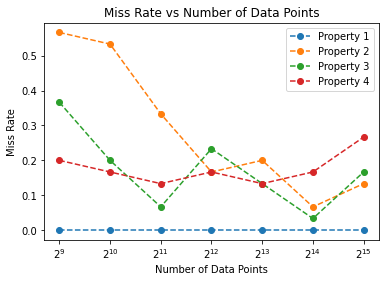

In [81]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

for property in [1,2,3,4]:
    print(f"Property {property}")
    print("Teacher Network")
    print(ndata_results_teacher[f'prop.{property}.result'].value_counts())

    count_results = ndata_results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    print(f"Property {property}")
    print("Student Network")
    print(ndata_results[f'prop.{property}.result'].value_counts())

    count_results = ndata_results.groupby("n_synthetic_data_points")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    plt.plot(student_miss_rate, label=f"Property {property}", marker="o", linestyle="--")

plt.legend()
plt.ylabel("Miss Rate")
plt.xlabel("Number of Data Points")
plt.gca().set_xscale("log", base=2)
# plt.gca().set_yscale("log")
plt.title("Miss Rate vs Number of Data Points")
plt.show()


